In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads (1).csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df = df.drop('User ID',axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
df['Gender']= label.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
x = df.iloc[:,:3].values
y= df.iloc[:,-1:].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain= scaler.transform(xtrain)
xtest = scaler.transform(xtest)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = dt.predict(xtest)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=ytest, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[40  6]
 [10 24]]


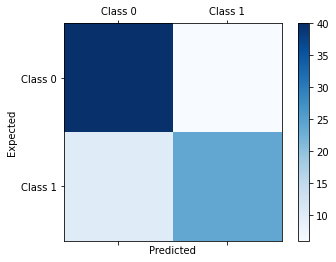

In [ ]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
acc=accuracy_score(ytest,y_pred)
f1=f1_score(ytest,y_pred)
auroc=roc_auc_score(ytest,y_pred)
print(acc,f1,auroc)

0.8 0.7500000000000001 0.7877237851662404


**Visualising the Training set results**

[Text(0.5032894736842105, 0.9583333333333334, 'X[1] <= 0.682\ngini = 0.449\nsamples = 320\nvalue = [211, 109]'),
 Text(0.2236842105263158, 0.875, 'X[2] <= 0.631\ngini = 0.275\nsamples = 237\nvalue = [198, 39]'),
 Text(0.10526315789473684, 0.7916666666666666, 'X[1] <= 0.393\ngini = 0.068\nsamples = 198\nvalue = [191, 7]'),
 Text(0.05263157894736842, 0.7083333333333334, 'X[1] <= -0.088\ngini = 0.042\nsamples = 186\nvalue = [182, 4]'),
 Text(0.02631578947368421, 0.625, 'gini = 0.0\nsamples = 130\nvalue = [130, 0]'),
 Text(0.07894736842105263, 0.625, 'X[2] <= 0.426\ngini = 0.133\nsamples = 56\nvalue = [52, 4]'),
 Text(0.05263157894736842, 0.5416666666666666, 'X[2] <= -0.045\ngini = 0.103\nsamples = 55\nvalue = [52, 3]'),
 Text(0.02631578947368421, 0.4583333333333333, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.07894736842105263, 0.4583333333333333, 'X[2] <= 0.043\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.05263157894736842, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0

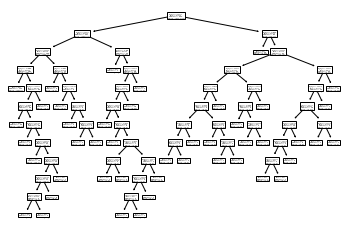

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

**Visualising the Test set results**

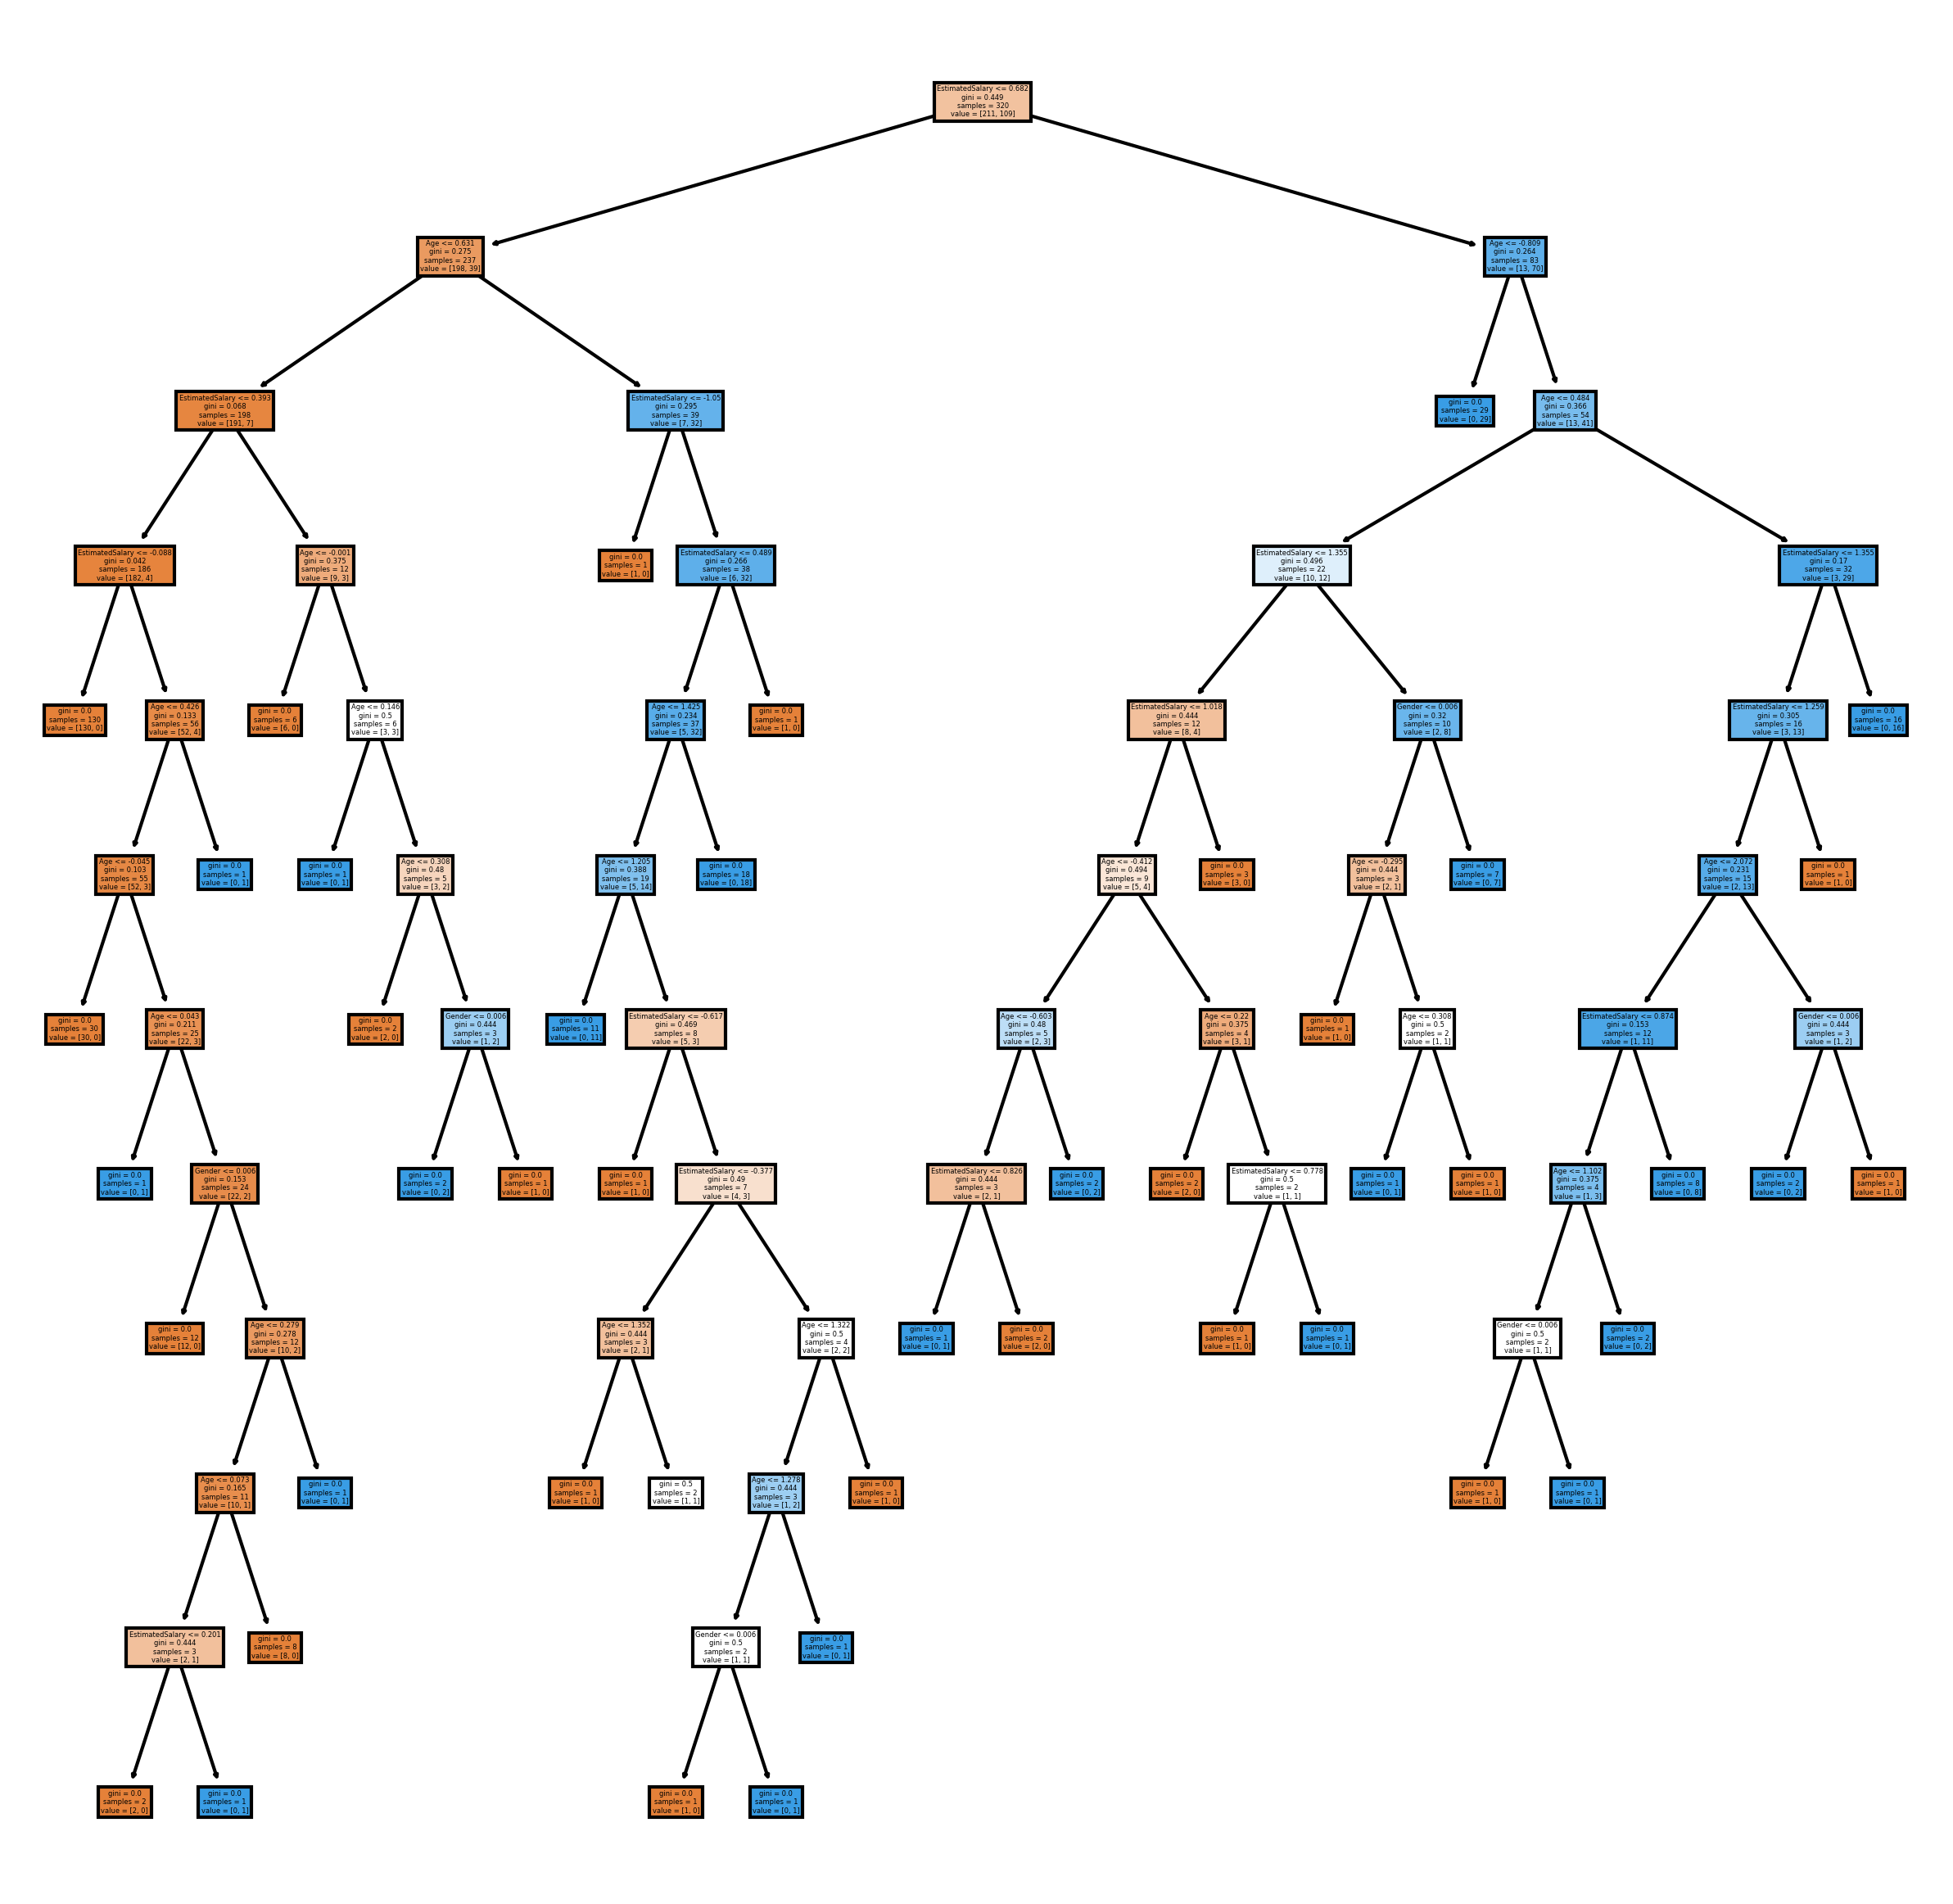

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dt,
               feature_names = ['Gender','EstimatedSalary','Age'],
               filled = True);
fig.savefig('imagename.png')